### Data Exploration

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

### Clinical Data

Clinical data are stored in excel file 'subject_clinical_data.xlsx'. The file contains the data of both patients with multiple sclerosis (ms) and controls. The columns store the following data:

- redcap_event_name - start date of the treatment
- dob - data of birth
- msonset - date of the onset of MS
- nrldata - date of the visit
- sex - sex of the patient (0 - female, 1 - male)
- dd - ms duration
- mstype - fenotype of the ms ( 0: RRMS, 1:SPMS, 2: PPMS)
- dmd - does patient receive a treatment (0 - no, 1 - yes)
- sdmt - substitution test score(cognitive test)
- EDDS - Expanded Disability Status Scale (scale from : 1-10, 0- no symptoms, 10- deceased)

Neuropsychological test scores:
- zsdmt - normalized substitution test score (according to Spanish norms)
- Pasat - Paced Auditory Serial Addition Test score (scores: 0-60) - a neuropsychological cognitive test
- Zpasat - z-scores in PASAT tests according to spanish normalization
- Zverbalmemory - mean z-score in a verbal memory test
- zvisualmemory - mean z-score in a visual memory test
- zattention = mean z-score of the sdmt and pasat score
- zfluency - score in verbal fluency
- zglobal - mean score obtained in all of the neuropsychological tests.

### Data loading and preparation

In [2]:
clinical_data = pd.read_excel('data\subject_clinical_data.xlsx', index_col = 0)
print(clinical_data.shape)
clinical_data.head()

(165, 22)


,redcap_event_name,controls_ms,dob,msonset,nrldate,age,sex,dd,mstype,dmd,...,oGMSSS,sdmt,sdmtz,pasat,zpasat,zverbalmemory,zvisualmemory,zattention,zfluency,zglobal
id,,,,,,,,,,,,,,,,,,,,,
002MSVIS,year3_arm_1,1,1963-09-04,1993-01-10,2015-03-16,51.53,1,22.18,1,0.0,...,8.103,NaN,NaN,55.0,0.2857,NaN,NaN,NaN,NaN,NaN
003MSVIS,year5_arm_1,1,1959-01-18,2007-07-15,2017-02-08,58.06,0,9.57,2,0.0,...,7.385,38.0,-0.7770,25.0,-2.6600,NaN,NaN,NaN,NaN,NaN
004MSVIS,year5_arm_1,1,1956-09-16,2010-09-15,2017-06-29,60.78,1,6.79,0,0.0,...,4.966,61.0,1.6250,58.0,0.7142,NaN,NaN,NaN,NaN,NaN
005MSVIS,year5_arm_1,1,1978-02-01,2007-08-01,2016-01-13,37.95,0,8.45,0,3.0,...,1.922,37.0,-0.5384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
010MSVIS,year5_arm_1,1,1964-02-13,2007-09-15,2016-10-04,52.64,0,9.05,0,1.0,...,2.649,NaN,NaN,40.0,-0.5000,NaN,NaN,NaN,NaN,NaN


#### Checking data types

In [3]:
clinical_data.dtypes

redcap_event_name            object
controls_ms                   int64
dob                  datetime64[ns]
msonset              datetime64[ns]
nrldate              datetime64[ns]
age                         float64
sex                           int64
dd                          float64
mstype                        int64
dmd                         float64
edss                        float64
uGMSSS                      float64
oGMSSS                      float64
sdmt                        float64
sdmtz                       float64
pasat                       float64
zpasat                      float64
zverbalmemory               float64
zvisualmemory               float64
zattention                  float64
zfluency                    float64
zglobal                     float64
dtype: object

We may observe that some of the categorical data (mstype, sex, edss) are stored as integers. We will change their type to categories.

In [4]:
for col in ["mstype", "sex", "edss"]:
    clinical_data[col] = clinical_data[col].astype('category')
clinical_data.dtypes

redcap_event_name            object
controls_ms                   int64
dob                  datetime64[ns]
msonset              datetime64[ns]
nrldate              datetime64[ns]
age                         float64
sex                        category
dd                          float64
mstype                     category
dmd                         float64
edss                       category
uGMSSS                      float64
oGMSSS                      float64
sdmt                        float64
sdmtz                       float64
pasat                       float64
zpasat                      float64
zverbalmemory               float64
zvisualmemory               float64
zattention                  float64
zfluency                    float64
zglobal                     float64
dtype: object

#### Missing values

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
alldata = clinical_data.isna().sum()*100/len(clinical_data)
controls = clinical_data.loc[clinical_data["controls_ms"] == 0].isna().sum()*100/len(clinical_data.loc[clinical_data["controls_ms"] == 0])
patients = clinical_data.loc[clinical_data["controls_ms"] == 1].isna().sum()*100/len(clinical_data.loc[clinical_data["controls_ms"] == 1])
data = {"alldata": alldata,
        "patients": patients,
        "controls": controls}

mv = pd.concat(data, axis = 1)
print("Missing values (%):", "\n", mv)


Missing values (%): 
                    alldata  patients  controls
redcap_event_name    10.91      0.00    100.00
controls_ms           0.00      0.00      0.00
dob                   4.85      0.00     44.44
msonset              10.91      0.00    100.00
nrldate               4.85      0.00     44.44
age                   0.00      0.00      0.00
sex                   0.00      0.00      0.00
dd                    0.00      0.00      0.00
mstype                0.00      0.00      0.00
dmd                  11.52      0.68    100.00
edss                  0.00      0.00      0.00
uGMSSS               10.91      0.00    100.00
oGMSSS               10.91      0.00    100.00
sdmt                 26.06     17.01    100.00
sdmtz                26.06     17.01    100.00
pasat                17.58      7.48    100.00
zpasat               24.24     14.97    100.00
zverbalmemory        61.21     56.46    100.00
zvisualmemory        61.21     56.46    100.00
zattention           62.42     57.82  

As we can see the file contains a lot of the missing data. The problems of missing data concerns the cognitive tests (zverbalmemory, zvisualmemory,zattention, zfluency, zglobal). As we can see some of the tests were performed in less than 50% of the patients. People from the control group didn't undergo the neuropsycholical tests as these test are designed to detect neuropsychological deficits which shouldn't be present in healthy population. Therefore we remove the columns with the most missing values from the dataframe (>50% of NA).

In [6]:
clinical_data.drop(columns = ['redcap_event_name','zverbalmemory','zvisualmemory', 'zattention', 'zfluency', 'zglobal'], inplace = True)
clinical_data.shape

(165, 16)

### Data exploration

#### Control group *vs.* Patients
First, we investigate the distribution of data in both groups. And then we will compare groups

In [12]:
controls = clinical_data.loc[clinical_data["controls_ms"] == 0]
controls.drop(columns= ["uGMSSS", "oGMSSS", "sdmt", "pasat", "zpasat"], inplace = True) #delete columns with 100% NaNs
patients = clinical_data.loc[clinical_data["controls_ms"] == 1]
print("Control Group:" ,"\n", controls.describe(), "\n")
print("Patients:","\n", patients.describe())
print("\n,\n","Control Group:" ,"\n", controls.describe(include = 'category'), "\n")
print("\n", "\n","Patients:","\n", patients.describe(include='category'))


Control Group: 
        controls_ms   age    dd  dmd  sdmtz
count        18.00 18.00 18.00 0.00   0.00
mean          0.00 36.62 -1.00  nan    nan
std           0.00  9.60  0.00  nan    nan
min           0.00 23.46 -1.00  nan    nan
25%           0.00 28.64 -1.00  nan    nan
50%           0.00 36.25 -1.00  nan    nan
75%           0.00 43.18 -1.00  nan    nan
max           0.00 55.70 -1.00  nan    nan 

Patients: 
        controls_ms    age     dd    dmd  uGMSSS  oGMSSS   sdmt  sdmtz  pasat  \
count       147.00 147.00 147.00 146.00  147.00  147.00 122.00 122.00 136.00   
mean          1.00  47.33  15.96   2.53    3.03    2.50  47.98   0.08  44.62   
std           0.00  10.15   9.05   3.17    2.01    1.96  13.35   1.06  12.50   
min           1.00  22.66   2.72   0.00    0.49    0.23  13.00  -4.17   8.00   
25%           1.00  39.91   9.25   0.00    1.42    0.94  38.00  -0.54  38.75   
50%           1.00  46.68  13.92   1.00    2.53    1.92  49.00   0.20  48.50   
75%           1.00  54

C:\Users\kamil\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


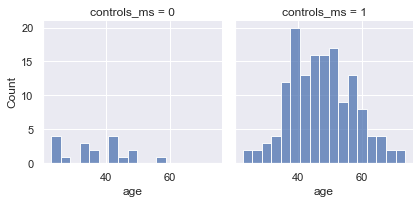

In [8]:
sns.set_theme(style="darkgrid")
sns.displot(
    clinical_data, x="age", col="controls_ms",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [9]:
controls = clinical_data.loc[clinical_data["controls_ms"] == 0]
patients = clinical_data.loc[clinical_data["controls_ms"] == 1]

#### Control group *vs.* Patients

In [ ]:
In this part we will compare